# **Modelagem geométrica de Animação**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)

# FUNÇÕES AUXILIARES

def matriz_translacao(tx, ty, tz):
    """Matriz de translação homogênea 4x4"""
    T = np.eye(4)
    T[0:3, 3] = [tx, ty, tz]
    return T

def matriz_escala(sx, sy, sz):
    """Matriz de escala homogênea 4x4"""
    S = np.eye(4)
    S[0, 0] = sx
    S[1, 1] = sy
    S[2, 2] = sz
    return S

def matriz_rotacao_rodrigues(v, theta, ponto=None):
    """
    Matriz de rotação usando fórmula de Rodrigues
    v: vetor direção do eixo (será normalizado)
    theta: ângulo em radianos
    ponto: ponto pelo qual o eixo passa (opcional)
    """
    # Normalizar vetor
    v = np.array(v)
    v = v / np.linalg.norm(v)
    
    vx, vy, vz = v
    c = np.cos(theta)
    s = np.sin(theta)
    C = 1 - c
    
    # Matriz de rotação 3x3
    R = np.array([
        [vx*vx*C + c,     vx*vy*C - vz*s, vx*vz*C + vy*s],
        [vy*vx*C + vz*s,  vy*vy*C + c,    vy*vz*C - vx*s],
        [vz*vx*C - vy*s,  vz*vy*C + vx*s, vz*vz*C + c]
    ])
    
    # Matriz homogênea 4x4
    M = np.eye(4)
    M[0:3, 0:3] = R
    
    # Se há um ponto no eixo, adicionar translação
    if ponto is not None:
        ponto = np.array(ponto)
        t = ponto - R @ ponto
        M[0:3, 3] = t
    
    return M

def matriz_reflexao_plano(normal, ponto):
    """
    Matriz de reflexão em relação a um plano
    normal: vetor normal ao plano
    ponto: ponto no plano
    """
    n = np.array(normal)
    n = n / np.linalg.norm(n)
    
    # Matriz de reflexão 3x3: I - 2nn^T
    R = np.eye(3) - 2 * np.outer(n, n)
    
    # Translação
    ponto = np.array(ponto)
    t = ponto - R @ ponto
    
    # Matriz homogênea
    M = np.eye(4)
    M[0:3, 0:3] = R
    M[0:3, 3] = t
    
    return M

## a) Considere a simulação do movimento de uma partícula através de rotações aﬁns. A partícula segue do ponto A = (2,-2,-3) ao ponto B = (2,1,0) descrevendo um arco circular centrado em C = (0,-1,-1). Encontre a matriz (ou uma sequência de produtos de matrizes) correspondente à transformação aﬁm que executa as rotações para que a partícula percorra a trajetória em arcos de 30 graus (H) de A até B. 

In [8]:
# PROBLEMA 1: MOVIMENTO DA PARTÍCULA (A > B em arcos de 30°)

print("="*40)
print("PROBLEMA 1: Movimento da Partícula em Arco Circular")
print("="*40)

A = np.array([2, -2, -3])
B = np.array([2, 1, 0])
C = np.array([0, -1, -1])  # Centro do arco

print(f"\nPonto inicial A: {A}")
print(f"Ponto final B: {B}")
print(f"Centro do arco C: {C}")

# Vetores CA e CB
CA = A - C
CB = B - C

print(f"\nVetor CA: {CA}")
print(f"Vetor CB: {CB}")
print(f"Raio |CA|: {np.linalg.norm(CA):.4f}")
print(f"Raio |CB|: {np.linalg.norm(CB):.4f}")

# Eixo de rotação: perpendicular ao plano formado por CA e CB
eixo = np.cross(CA, CB)
eixo_unit = eixo / np.linalg.norm(eixo)

print(f"\nEixo de rotação (CA × CB): {eixo}")
print(f"Eixo normalizado: {eixo_unit}")

# Ângulo total entre A e B
cos_angle = np.dot(CA, CB) / (np.linalg.norm(CA) * np.linalg.norm(CB))
angulo_total = np.arccos(cos_angle)
print(f"\nÂngulo total A→B: {np.degrees(angulo_total):.2f}°")

# Incremento de 30 graus
incremento = np.radians(30)
num_passos = int(np.ceil(angulo_total / incremento))

print(f"Incremento: 30° = {incremento:.4f} rad")
print(f"Número de passos: {num_passos}")

# Matriz de rotação para cada passo de 30°
M_passo = matriz_rotacao_rodrigues(eixo_unit, incremento, C)

print("\n" + "="*40)
print("MATRIZ PARA CADA PASSO DE 30° (coordenadas homogêneas):")
print("="*40)
print(M_passo)

# Simular trajetória
trajetoria = [A]
ponto_atual = np.append(A, 1)

print("\n" + "="*40)
print("TRAJETÓRIA DA PARTÍCULA:")
print("="*40)
print(f"Passo 0: {ponto_atual[0:3]}")

for i in range(num_passos):
    ponto_atual = M_passo @ ponto_atual
    trajetoria.append(ponto_atual[0:3])
    print(f"Passo {i+1}: {ponto_atual[0:3]}")

trajetoria = np.array(trajetoria)

PROBLEMA 1: Movimento da Partícula em Arco Circular

Ponto inicial A: [ 2 -2 -3]
Ponto final B: [2 1 0]
Centro do arco C: [ 0 -1 -1]

Vetor CA: [ 2 -1 -2]
Vetor CB: [2 2 1]
Raio |CA|: 3.0000
Raio |CB|: 3.0000

Eixo de rotação (CA × CB): [ 3 -6  6]
Eixo normalizado: [ 0.3333 -0.6667  0.6667]

Ângulo total A→B: 90.00°
Incremento: 30° = 0.5236 rad
Número de passos: 3

MATRIZ PARA CADA PASSO DE 30° (coordenadas homogêneas):
[[ 0.8809 -0.3631 -0.3036 -0.6667]
 [ 0.3036  0.9256 -0.2262 -0.3006]
 [ 0.3631  0.1071  0.9256  0.0327]
 [ 0.      0.      0.      1.    ]]

TRAJETÓRIA DA PARTÍCULA:
Passo 0: [ 2 -2 -3]
Passo 1: [ 2.7321 -0.866  -2.2321]
Passo 2: [ 2.7321  0.2321 -1.134 ]
Passo 3: [ 2.  1. -0.]


## b) Descreva através de matrizes em coordenadas homogêneas do operador aﬁm que faz uma rotação de 30◦ em torno da reta dirigida pelo vetor (1,-1,1), e que passa no ponto (-1,1,0), seguida de um aumento de escala com fatores 3, -2 e 0,5 para as direções x, y e z, respectivamente, seguida de uma translação (1,-2,−3). 

In [9]:
# PROBLEMA 2: COMPOSIÇÃO DE TRANSFORMAÇÕES

print("\n" + "="*40)
print("PROBLEMA 2: Composição - Rotação + Escala + Translação")
print("="*40)

# 1. Rotação de 30° em torno da reta com direção (1,-1,1) passando por (-1,1,0)
v2 = np.array([1, -1, 1])
ponto2 = np.array([-1, 1, 0])
theta2 = np.radians(30)

M2_rot = matriz_rotacao_rodrigues(v2, theta2, ponto2)

print("\n1. ROTAÇÃO 30° em torno de reta (1,-1,1) passando por (-1,1,0):")
print(M2_rot)

# 2. Escala: sx=3, sy=-2, sz=0.5
M2_escala = matriz_escala(3, -2, 0.5)

print("\n2. ESCALA (3, -2, 0.5):")
print(M2_escala)

# 3. Translação (1, -2, -3)
M2_trans = matriz_translacao(1, -2, -3)

print("\n3. TRANSLAÇÃO (1, -2, -3):")
print(M2_trans)

# Composição: Translação * Escala * Rotação
M2_composta = M2_trans @ M2_escala @ M2_rot

print("\n" + "="*40)
print("MATRIZ COMPOSTA DO PROBLEMA 2:")
print("M = T(1,-2,-3) × S(3,-2,0.5) × R(30°, eixo)")
print("="*40)
print(M2_composta)


PROBLEMA 2: Composição - Rotação + Escala + Translação

1. ROTAÇÃO 30° em torno de reta (1,-1,1) passando por (-1,1,0):
[[ 0.9107 -0.3333 -0.244   0.244 ]
 [ 0.244   0.9107 -0.3333  0.3333]
 [ 0.3333  0.244   0.9107  0.0893]
 [ 0.      0.      0.      1.    ]]

2. ESCALA (3, -2, 0.5):
[[ 3.   0.   0.   0. ]
 [ 0.  -2.   0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.   1. ]]

3. TRANSLAÇÃO (1, -2, -3):
[[ 1.  0.  0.  1.]
 [ 0.  1.  0. -2.]
 [ 0.  0.  1. -3.]
 [ 0.  0.  0.  1.]]

MATRIZ COMPOSTA DO PROBLEMA 2:
M = T(1,-2,-3) × S(3,-2,0.5) × R(30°, eixo)
[[ 2.7321 -1.     -0.7321  1.7321]
 [-0.488  -1.8214  0.6667 -2.6667]
 [ 0.1667  0.122   0.4553 -2.9553]
 [ 0.      0.      0.      1.    ]]


## c) Considere a reflexão em relação ao plano 𝑥 − 𝑦 = 1, seguida de uma rotação anti-horária de 30° em torno da reta (t,0,-t) (considere que o eixo da reta tem o sentido (1,0,-1)). Encontre a matriz em coordenadas homogêneas do operador composto resultante (pode ser apresentada na forma de produto de várias matrizes). 

In [10]:
# PROBLEMA 3: REFLEXÃO + ROTAÇÃO

print("\n" + "="*40)
print("PROBLEMA 3: Reflexão no plano x-y=1 + Rotação 30°")
print("="*40)

# 1. Reflexão no plano x - y = 1
# Forma: x - y - 1 = 0
# Normal: (1, -1, 0)
# Ponto no plano: podemos usar (1, 0, 0) pois 1-0=1 ✓

normal3 = np.array([1, -1, 0])
ponto_plano = np.array([1, 0, 0])

M3_refl = matriz_reflexao_plano(normal3, ponto_plano)

print("\n1. REFLEXÃO no plano x - y = 1:")
print(f"   Normal: {normal3}")
print(f"   Ponto no plano: {ponto_plano}")
print(M3_refl)

# 2. Rotação anti-horária de 30° em torno da reta (t, 0, -t)
# Direção: (1, 0, -1)
# Ponto na reta: (0, 0, 0)

v3 = np.array([1, 0, -1])
ponto3 = np.array([0, 0, 0])
theta3 = np.radians(30)

M3_rot = matriz_rotacao_rodrigues(v3, theta3, ponto3)

print("\n2. ROTAÇÃO 30° anti-horária em torno de reta (t, 0, -t):")
print(f"   Direção: {v3}")
print(f"   Ponto na reta: {ponto3}")
print(M3_rot)

# Composição: Rotação * Reflexão
M3_composta = M3_rot @ M3_refl

print("\n" + "="*40)
print("MATRIZ COMPOSTA DO PROBLEMA 3:")
print("M = R(30°, eixo) × Reflexão(x-y=1)")
print("="*40)
print(M3_composta)


PROBLEMA 3: Reflexão no plano x-y=1 + Rotação 30°

1. REFLEXÃO no plano x - y = 1:
   Normal: [ 1 -1  0]
   Ponto no plano: [1 0 0]
[[ 0.  1.  0.  1.]
 [ 1.  0.  0. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

2. ROTAÇÃO 30° anti-horária em torno de reta (t, 0, -t):
   Direção: [ 1  0 -1]
   Ponto na reta: [0 0 0]
[[ 0.933   0.3536 -0.067   0.    ]
 [-0.3536  0.866  -0.3536  0.    ]
 [-0.067   0.3536  0.933   0.    ]
 [ 0.      0.      0.      1.    ]]

MATRIZ COMPOSTA DO PROBLEMA 3:
M = R(30°, eixo) × Reflexão(x-y=1)
[[ 0.3536  0.933  -0.067   0.5795]
 [ 0.866  -0.3536 -0.3536 -1.2196]
 [ 0.3536 -0.067   0.933  -0.4205]
 [ 0.      0.      0.      1.    ]]


## VISUALIZAÇÃO 3D


GERANDO VISUALIZAÇÕES 3D...


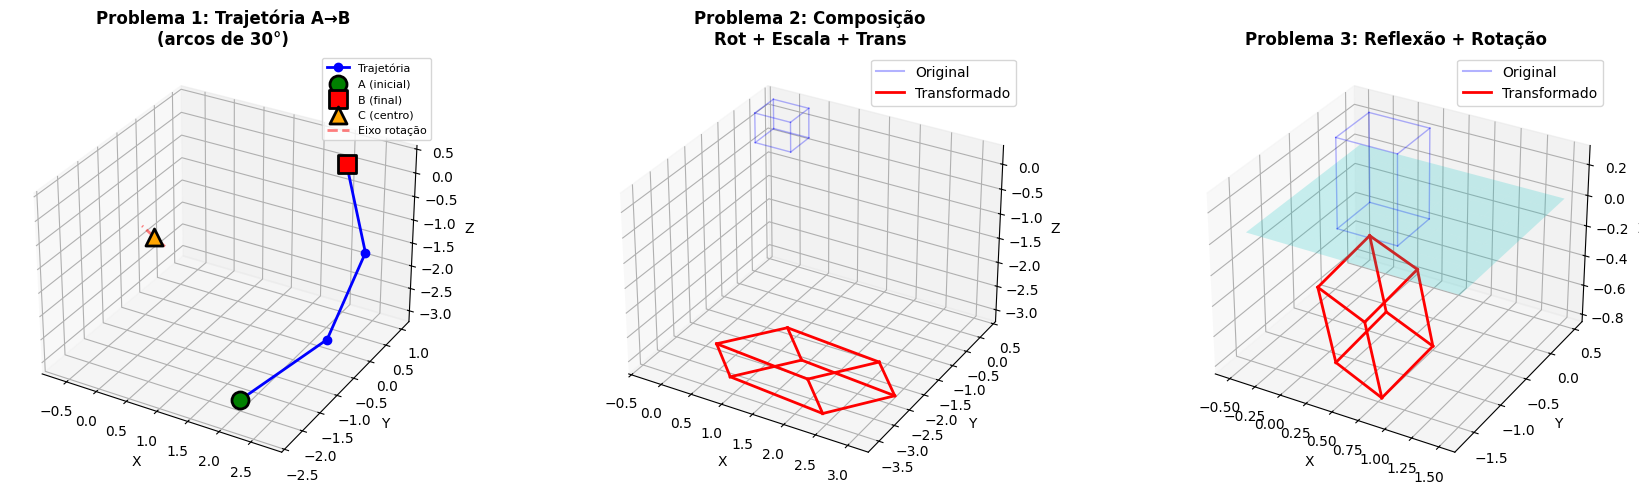

In [11]:
# VISUALIZAÇÃO 3D

print("\n" + "="*40)
print("GERANDO VISUALIZAÇÕES 3D...")
print("="*40)

fig = plt.figure(figsize=(18, 5))

# PROBLEMA 1: Trajetória da partícula
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Problema 1: Trajetória A→B\n(arcos de 30°)', fontweight='bold')

# Trajetória
ax1.plot(trajetoria[:, 0], trajetoria[:, 1], trajetoria[:, 2], 
         'b-o', linewidth=2, markersize=6, label='Trajetória')

# Pontos especiais
ax1.scatter(*A, color='green', s=150, marker='o', label='A (inicial)', edgecolors='black', linewidth=2)
ax1.scatter(*B, color='red', s=150, marker='s', label='B (final)', edgecolors='black', linewidth=2)
ax1.scatter(*C, color='orange', s=150, marker='^', label='C (centro)', edgecolors='black', linewidth=2)

# Eixo de rotação
t_vals = np.linspace(-2, 2, 50)
eixo_pts = np.array([C + t*eixo_unit for t in t_vals])
ax1.plot(eixo_pts[:, 0], eixo_pts[:, 1], eixo_pts[:, 2], 
         'r--', alpha=0.5, linewidth=2, label='Eixo rotação')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# PROBLEMA 2: Visualização da composição
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Problema 2: Composição\nRot + Escala + Trans', fontweight='bold')

# Cubo teste
cubo = np.array([
    [-0.3, -0.3, -0.3], [0.3, -0.3, -0.3],
    [0.3, 0.3, -0.3], [-0.3, 0.3, -0.3],
    [-0.3, -0.3, 0.3], [0.3, -0.3, 0.3],
    [0.3, 0.3, 0.3], [-0.3, 0.3, 0.3]
])

arestas = [
    [0,1], [1,2], [2,3], [3,0],
    [4,5], [5,6], [6,7], [7,4],
    [0,4], [1,5], [2,6], [3,7]
]

# Original
for i, j in arestas:
    ax2.plot([cubo[i][0], cubo[j][0]], 
             [cubo[i][1], cubo[j][1]], 
             [cubo[i][2], cubo[j][2]], 'b-', alpha=0.3, linewidth=1)

# Transformado
cubo_trans2 = np.array([M2_composta @ np.append(v, 1) for v in cubo])[:, 0:3]
for i, j in arestas:
    ax2.plot([cubo_trans2[i][0], cubo_trans2[j][0]], 
             [cubo_trans2[i][1], cubo_trans2[j][1]], 
             [cubo_trans2[i][2], cubo_trans2[j][2]], 'r-', linewidth=2)

ax2.plot([], [], 'b-', alpha=0.3, label='Original')
ax2.plot([], [], 'r-', linewidth=2, label='Transformado')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.grid(True, alpha=0.3)

# PROBLEMA 3: Reflexão + Rotação
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Problema 3: Reflexão + Rotação', fontweight='bold')

# Original
for i, j in arestas:
    ax3.plot([cubo[i][0], cubo[j][0]], 
             [cubo[i][1], cubo[j][1]], 
             [cubo[i][2], cubo[j][2]], 'b-', alpha=0.3, linewidth=1)

# Transformado
cubo_trans3 = np.array([M3_composta @ np.append(v, 1) for v in cubo])[:, 0:3]
for i, j in arestas:
    ax3.plot([cubo_trans3[i][0], cubo_trans3[j][0]], 
             [cubo_trans3[i][1], cubo_trans3[j][1]], 
             [cubo_trans3[i][2], cubo_trans3[j][2]], 'r-', linewidth=2)

# Plano x - y = 1
xx, yy = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
zz = np.zeros_like(xx)
xx_plano = xx + 0.5
yy_plano = yy - 0.5
ax3.plot_surface(xx_plano, yy_plano, zz, alpha=0.2, color='cyan')

ax3.plot([], [], 'b-', alpha=0.3, label='Original')
ax3.plot([], [], 'r-', linewidth=2, label='Transformado')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# RESUMO FINAL

print("\n" + "="*40)
print("RESUMO DAS MATRIZES COMPOSTAS")
print("="*40)

print("\n PROBLEMA 1: Matriz de rotação de 30° para trajetória A→B")
print("   (aplicar múltiplas vezes)")
print(M_passo)

print("\n PROBLEMA 2: M = T(1,-2,-3) × S(3,-2,0.5) × R(30°)")
print(M2_composta)

print("\n PROBLEMA 3: M = R(30°) × Reflexão(x-y=1)")
print(M3_composta)

print("\n" + "="*40)


RESUMO DAS MATRIZES COMPOSTAS

 PROBLEMA 1: Matriz de rotação de 30° para trajetória A→B
   (aplicar múltiplas vezes)
[[ 0.8809 -0.3631 -0.3036 -0.6667]
 [ 0.3036  0.9256 -0.2262 -0.3006]
 [ 0.3631  0.1071  0.9256  0.0327]
 [ 0.      0.      0.      1.    ]]

 PROBLEMA 2: M = T(1,-2,-3) × S(3,-2,0.5) × R(30°)
[[ 2.7321 -1.     -0.7321  1.7321]
 [-0.488  -1.8214  0.6667 -2.6667]
 [ 0.1667  0.122   0.4553 -2.9553]
 [ 0.      0.      0.      1.    ]]

 PROBLEMA 3: M = R(30°) × Reflexão(x-y=1)
[[ 0.3536  0.933  -0.067   0.5795]
 [ 0.866  -0.3536 -0.3536 -1.2196]
 [ 0.3536 -0.067   0.933  -0.4205]
 [ 0.      0.      0.      1.    ]]

